In [1]:
import pandas as pd


In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split


In [3]:
fp = r"A:\python\AQI Data Set.csv"



In [4]:
df=pd.read_csv(fp)
nctr=11
df=df.iloc[:, :nctr]
print(df)


    Id Mounths  PM10 in æg/m3  SO2 in æg/m3  NOx  in æg/m3   PM2.5  in æg/m3  \
0    1  Jan-17          174.0          26.4           35.0                79   
1    2  Feb-17          143.0          35.1           40.3                75   
2    3  Mar-17          142.0          32.1           30.9                59   
3    4  Apr-17          117.0          50.9           36.3                75   
4    5  May-17            NaN          41.6           25.2                53   
..  ..     ...            ...           ...            ...               ...   
67  68  Aug-22           89.0          12.0           35.0                22   
68  69  Sep-22           92.0          13.0           37.3                30   
69  70  Oct-22           93.0          12.0           30.7                46   
70  71  Nov-22           87.0          10.4           28.2                78   
71  72  Dec-22           88.0          13.0           34.5                72   

    Ammonia - NH3  in æg/m3  O3   in æg

In [5]:
df=pd.read_csv(fp)
nctr=11
df=df.iloc[:, :nctr]
print(df)


    Id Mounths  PM10 in æg/m3  SO2 in æg/m3  NOx  in æg/m3   PM2.5  in æg/m3  \
0    1  Jan-17          174.0          26.4           35.0                79   
1    2  Feb-17          143.0          35.1           40.3                75   
2    3  Mar-17          142.0          32.1           30.9                59   
3    4  Apr-17          117.0          50.9           36.3                75   
4    5  May-17            NaN          41.6           25.2                53   
..  ..     ...            ...           ...            ...               ...   
67  68  Aug-22           89.0          12.0           35.0                22   
68  69  Sep-22           92.0          13.0           37.3                30   
69  70  Oct-22           93.0          12.0           30.7                46   
70  71  Nov-22           87.0          10.4           28.2                78   
71  72  Dec-22           88.0          13.0           34.5                72   

    Ammonia - NH3  in æg/m3  O3   in æg

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       72 non-null     int64  
 1   Mounths                  72 non-null     object 
 2   PM10 in æg/m3            66 non-null     float64
 3   SO2 in æg/m3             71 non-null     float64
 4   NOx  in æg/m3            70 non-null     float64
 5    PM2.5  in æg/m3         72 non-null     int64  
 6   Ammonia - NH3  in æg/m3  72 non-null     float64
 7   O3   in æg/m3            72 non-null     float64
 8   CO  in mg/m3             72 non-null     float64
 9    Benzene  in æg/m3       72 non-null     float64
 10  AQI                      67 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 6.3+ KB


In [7]:
CtoR=['Id','Mounths']
df=df.drop(CtoR,axis=1)
print(df)


    PM10 in æg/m3  SO2 in æg/m3  NOx  in æg/m3   PM2.5  in æg/m3  \
0           174.0          26.4           35.0                79   
1           143.0          35.1           40.3                75   
2           142.0          32.1           30.9                59   
3           117.0          50.9           36.3                75   
4             NaN          41.6           25.2                53   
..            ...           ...            ...               ...   
67           89.0          12.0           35.0                22   
68           92.0          13.0           37.3                30   
69           93.0          12.0           30.7                46   
70           87.0          10.4           28.2                78   
71           88.0          13.0           34.5                72   

    Ammonia - NH3  in æg/m3  O3   in æg/m3  CO  in mg/m3   Benzene  in æg/m3  \
0                      25.0          107.6          0.90                0.70   
1                      

In [8]:
ctn=[ 'SO2 in æg/m3','NOx  in æg/m3','Ammonia - NH3  in æg/m3','O3   in æg/m3','CO  in mg/m3','AQI']
x=df[ctn].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled
df[ctn]=x_scaled
df


,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,174.0,0.477612,0.757991,79,0.538462,1.000000,0.530303,0.70,0.842593
1,143.0,0.663113,1.000000,75,0.769231,0.956274,0.530303,0.90,0.657407
2,142.0,0.599147,0.570776,59,0.576923,0.744297,0.454545,0.50,0.648148
3,117.0,1.000000,0.817352,75,0.961538,0.732890,0.530303,0.70,0.490741
4,NaN,0.801706,0.310502,53,0.653846,0.642586,0.227273,0.50,NaN
...,...,...,...,...,...,...,...,...,...
67,89.0,0.170576,0.757991,22,0.576923,0.121673,0.333333,0.09,0.083333
68,92.0,0.191898,0.863014,30,0.769231,0.072243,0.378788,0.06,0.166667
69,93.0,0.170576,0.561644,46,0.653846,0.069392,0.356061,0.07,0.398148
70,87.0,0.136461,0.447489,78,0.730769,0.092205,1.000000,0.03,1.000000


In [9]:
df.head(10)

,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,174.0,0.477612,0.757991,79,0.538462,1.000000,0.530303,0.7,0.842593
1,143.0,0.663113,1.000000,75,0.769231,0.956274,0.530303,0.9,0.657407
2,142.0,0.599147,0.570776,59,0.576923,0.744297,0.454545,0.5,0.648148
3,117.0,1.000000,0.817352,75,0.961538,0.732890,0.530303,0.7,0.490741
4,NaN,0.801706,0.310502,53,0.653846,0.642586,0.227273,0.5,NaN
5,NaN,0.671642,0.127854,25,0.576923,0.346008,0.075758,0.6,NaN
6,111.0,0.744136,0.141553,29,0.730769,0.209125,0.075758,0.7,0.450926
7,78.0,0.682303,0.000000,35,0.461538,0.191065,0.151515,0.5,0.187963
8,86.0,0.554371,0.178082,39,0.346154,0.311787,0.151515,0.4,0.259259
9,146.0,0.705757,0.648402,63,0.461538,0.479087,0.303030,0.5,0.666667


In [10]:
df=df.fillna(df.mean())

In [11]:
df.std()

PM10 in æg/m3              24.180005
SO2 in æg/m3                0.207134
NOx  in æg/m3               0.186814
 PM2.5  in æg/m3           20.224251
Ammonia - NH3  in æg/m3     0.224017
O3   in æg/m3               0.214695
CO  in mg/m3                0.180882
 Benzene  in æg/m3          0.193070
AQI                         0.203208
dtype: float64

In [12]:
df.mean()

PM10 in æg/m3              109.393939
SO2 in æg/m3                 0.269738
NOx  in æg/m3                0.537508
 PM2.5  in æg/m3            46.722222
Ammonia - NH3  in æg/m3      0.499893
O3   in æg/m3                0.241352
CO  in mg/m3                 0.264941
 Benzene  in æg/m3           0.225000
AQI                          0.440478
dtype: float64

In [13]:
df=df.fillna(df.mean())

In [14]:
#training and testing

a=df


In [15]:
b=df['AQI']

In [16]:
len(a.columns)

9

In [17]:
a.columns

Index(['PM10 in æg/m3', 'SO2 in æg/m3', 'NOx  in æg/m3', ' PM2.5  in æg/m3',
       'Ammonia - NH3  in æg/m3', 'O3   in æg/m3', 'CO  in mg/m3',
       ' Benzene  in æg/m3', 'AQI'],
      dtype='object')

In [18]:
feature_list=['PM10 in æg/m3', 'SO2 in æg/m3', 'NOx  in æg/m3', ' PM2.5  in æg/m3',
       'Ammonia - NH3  in æg/m3', 'O3   in æg/m3', 'CO  in mg/m3',
       ' Benzene  in æg/m3', 'AQI']

In [19]:
len(feature_list)

9

In [20]:
a=df[feature_list]
a.head()


,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,174.000000,0.477612,0.757991,79,0.538462,1.000000,0.530303,0.7,0.842593
1,143.000000,0.663113,1.000000,75,0.769231,0.956274,0.530303,0.9,0.657407
2,142.000000,0.599147,0.570776,59,0.576923,0.744297,0.454545,0.5,0.648148
3,117.000000,1.000000,0.817352,75,0.961538,0.732890,0.530303,0.7,0.490741
4,109.393939,0.801706,0.310502,53,0.653846,0.642586,0.227273,0.5,0.440478


In [21]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3,random_state =42)


In [22]:
print(a_train)
print(a_test)
print(b_train)
print(b_test)


    PM10 in æg/m3  SO2 in æg/m3  NOx  in æg/m3   PM2.5  in æg/m3  \
35     108.000000      0.023454       0.561644                73   
44      79.000000      0.394456       0.442922                23   
69      93.000000      0.170576       0.561644                46   
7       78.000000      0.682303       0.000000                35   
55      82.000000      0.445629       0.392694                24   
42     129.000000      0.127932       0.438356                18   
30      95.000000      0.332623       0.497717                24   
46     102.000000      0.149254       0.621005                59   
71      88.000000      0.191898       0.735160                72   
19     171.000000      0.266525       0.474886                19   
58      97.000000      0.115139       0.525114                49   
25     106.000000      0.044776       0.506849                56   
40     122.000000      0.170576       0.315068                30   
13     178.000000      0.277186       0.849315  

In [23]:
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
a_train=stc.fit_transform(a_train)
a_test=stc.transform(a_test)


In [24]:
# ------------------------ RandomForestRegressor ------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor with a max depth of 2 and 100 trees
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)

# Train the model using training data
regr.fit(a_train, b_train)

# Predict using the test data
b_pred = regr.predict(a_test)

# Evaluate the model
print('RandomForestRegressor Results:')
print('MSE =', mean_squared_error(b_test, b_pred))    # Mean Squared Error
print('MAE =', mean_absolute_error(b_test, b_pred))    # Mean Absolute Error
print('R2 Score =', r2_score(b_test, b_pred))          # Coefficient of Determination (R²)
print()

RandomForestRegressor Results:
MSE = 0.002885151649564015
MAE = 0.038439748834045474
R2 Score = 0.9242859156295021



In [25]:
#for evaluating  GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.1, random_state=0)

# Train the model
gbr.fit(a_train, b_train)

# Make predictions
b_pred = gbr.predict(a_test)

# Calculate evaluation metrics
mse = mean_squared_error(b_test, b_pred)
mae = mean_absolute_error(b_test, b_pred)
r2 = r2_score(b_test, b_pred)

# Print the evaluation results
print('MSE =', mse)
print('MAE =', mae)
print('R2 Score =', r2)


MSE = 9.985443391432642e-05
MAE = 0.008115294817701015
R2 Score = 0.9973795529828389


In [26]:
#for evaluating  xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate XGBRegressor
xgbr = xgb.XGBRegressor(max_depth=2, n_estimators=100, learning_rate=0.1, random_state=0)

# Train the model
xgbr.fit(a_train, b_train)

# Make predictions
b_pred = xgbr.predict(a_test)

# Calculate evaluation metrics
mse = mean_squared_error(b_test, b_pred)
mae = mean_absolute_error(b_test, b_pred)
r2 = r2_score(b_test, b_pred)

# Print the evaluation results
print('MSE =', mse)
print('MAE =', mae)
print('R2 Score =', r2)


MSE = 0.0005685074860924689
MAE = 0.013482924106447691
R2 Score = 0.9850808453088525


In [27]:
#for evaluating  xgboost rf

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate XGBRFRegressor
xgbrf = xgb.XGBRFRegressor(max_depth=2, n_estimators=100, random_state=0)

# Train the model
xgbrf.fit(a_train, b_train)

# Make predictions
b_pred = xgbrf.predict(a_test)

# Calculate evaluation metrics
mse = mean_squared_error(b_test, b_pred)
mae = mean_absolute_error(b_test, b_pred)
r2 = r2_score(b_test, b_pred)

# Print the evaluation results
print('MSE =', mse)
print('MAE =', mae)
print('R2 Score =', r2)


MSE = 0.003572990844758268
MAE = 0.04386343571704095
R2 Score = 0.9062351782042639


In [28]:
df.describe()

,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.00000,72.000000
mean,109.393939,0.269738,0.537508,46.722222,0.499893,0.241352,0.264941,0.22500,0.440478
std,24.180005,0.207134,0.186814,20.224251,0.224017,0.214695,0.180882,0.19307,0.203208
min,76.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,90.750000,0.126866,0.441781,27.000000,0.346154,0.095770,0.151515,0.10000,0.314815
50%,105.500000,0.215352,0.518265,47.000000,0.461538,0.174430,0.227273,0.20000,0.430556
75%,123.500000,0.319829,0.641553,63.000000,0.653846,0.315114,0.339015,0.30000,0.564815
max,178.000000,1.000000,1.000000,87.000000,1.000000,1.000000,1.000000,0.90000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PM10 in æg/m3            72 non-null     float64
 1   SO2 in æg/m3             72 non-null     float64
 2   NOx  in æg/m3            72 non-null     float64
 3    PM2.5  in æg/m3         72 non-null     int64  
 4   Ammonia - NH3  in æg/m3  72 non-null     float64
 5   O3   in æg/m3            72 non-null     float64
 6   CO  in mg/m3             72 non-null     float64
 7    Benzene  in æg/m3       72 non-null     float64
 8   AQI                      72 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 5.2 KB


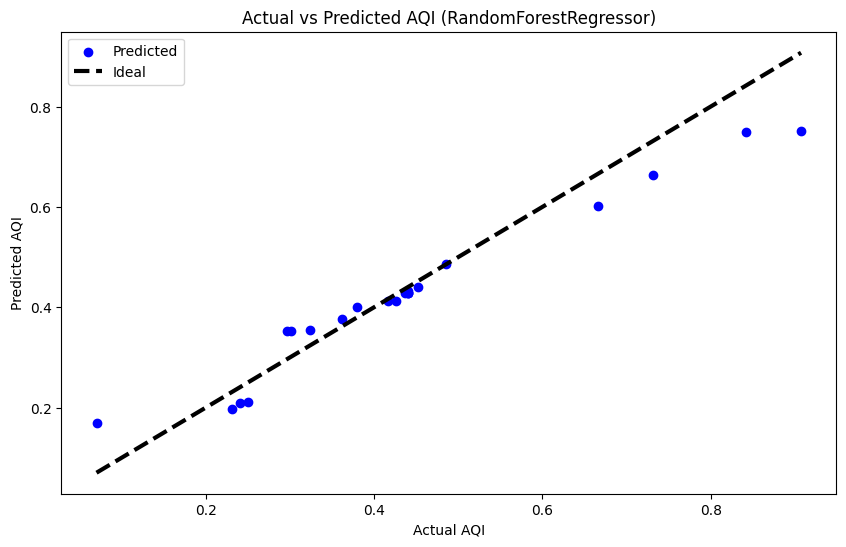

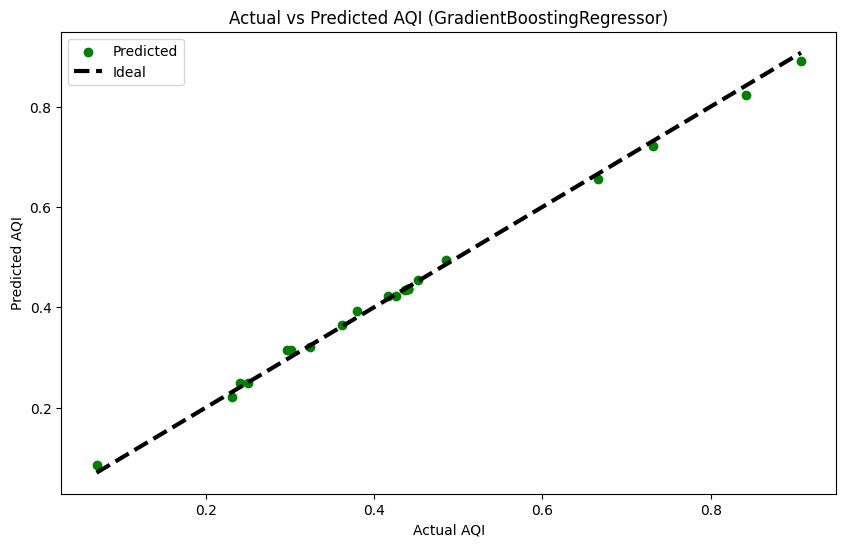

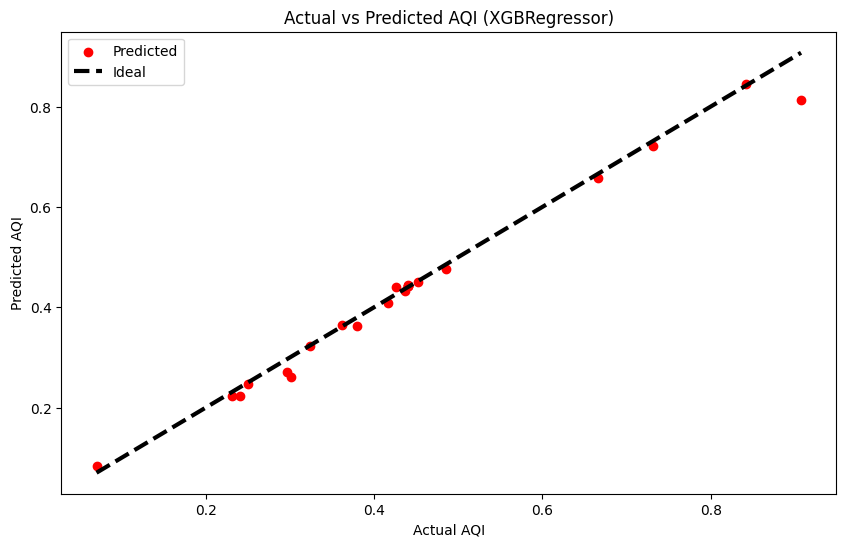

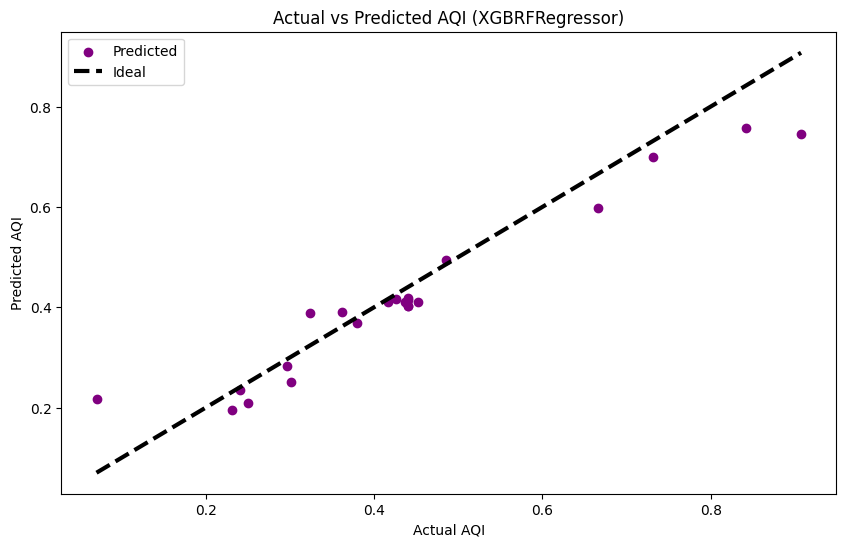

In [30]:
import matplotlib.pyplot as plt

# Assuming a_test and b_test are defined
rf_pred = regr.predict(a_test)  # RandomForestRegressor
gb_pred = gbr.predict(a_test)  # GradientBoostingRegressor
xgb_pred = xgbr.predict(a_test)  # XGBRegressor
xgbrf_pred = xgbrf.predict(a_test)  # XGBRFRegressor

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(actual, predicted, model_name, color):
    plt.figure(figsize=(10, 6))
    plt.scatter(actual, predicted, color=color, label="Predicted")
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=3, label="Ideal")
    plt.xlabel('Actual AQI')
    plt.ylabel('Predicted AQI')
    plt.title(f'Actual vs Predicted AQI ({model_name})')
    plt.legend()
    plt.show()

# Plot each model's results
plot_actual_vs_predicted(b_test, rf_pred, "RandomForestRegressor", "blue")
plot_actual_vs_predicted(b_test, gb_pred, "GradientBoostingRegressor", "green")
plot_actual_vs_predicted(b_test, xgb_pred, "XGBRegressor", "red")
plot_actual_vs_predicted(b_test, xgbrf_pred, "XGBRFRegressor", "purple")


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# Function to plot actual vs predicted values with R² score and style
def plot_actual_vs_predicted(actual, predicted, model_name, color):
    r2 = r2_score(actual, predicted)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(actual, predicted, color=color, label="Predicted", edgecolor='k')  # red dots with black edge
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k-', lw=2, label="Ideal Fit")
    
    # Add R² score on the plot
    plt.text(0.05, 0.9, f'$R^2$ = {r2:.4f}', fontsize=12, transform=plt.gca().transAxes)
    
    plt.xlabel('Measured AQI')
    plt.ylabel('Predicted AQI')
    plt.title(model_name)
    plt.tight_layout()
    plt.show()


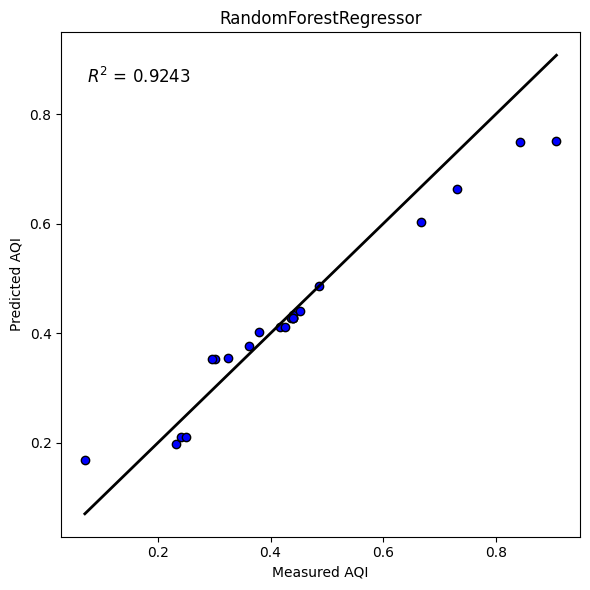

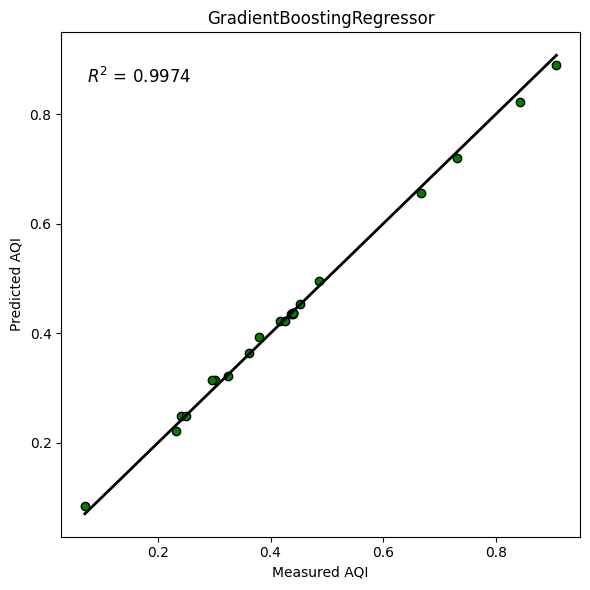

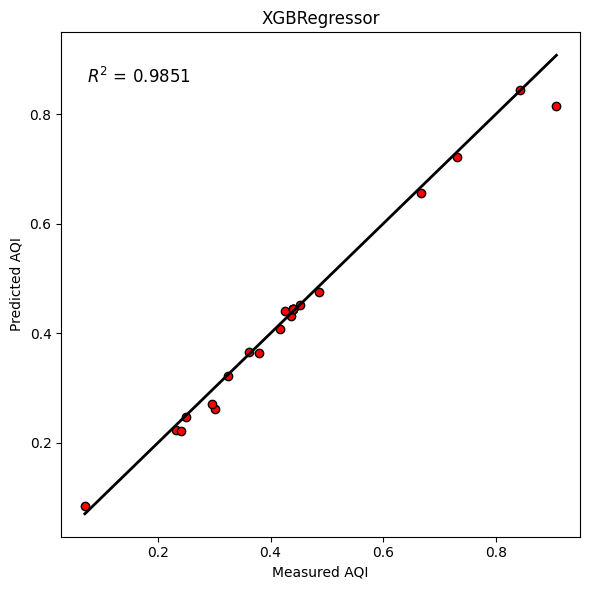

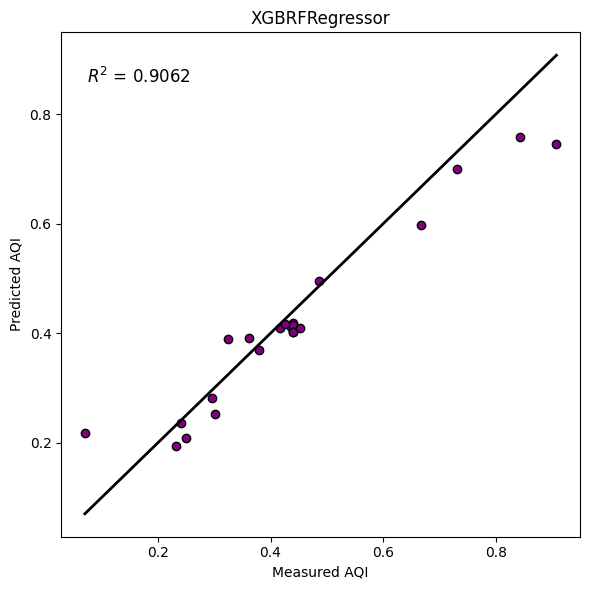

In [32]:
# Predictions
rf_pred = regr.predict(a_test)
gb_pred = gbr.predict(a_test)
xgb_pred = xgbr.predict(a_test)
xgbrf_pred = xgbrf.predict(a_test)

# Plot for each model
plot_actual_vs_predicted(b_test, rf_pred, "RandomForestRegressor", "blue")
plot_actual_vs_predicted(b_test, gb_pred, "GradientBoostingRegressor", "green")
plot_actual_vs_predicted(b_test, xgb_pred, "XGBRegressor", "red")
plot_actual_vs_predicted(b_test, xgbrf_pred, "XGBRFRegressor", "purple")


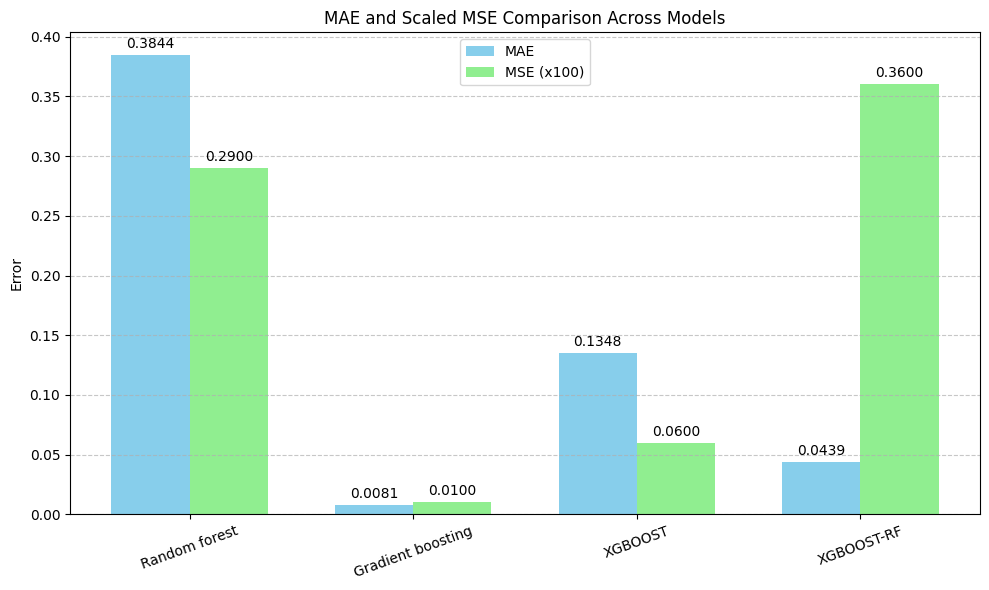

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and corresponding error metrics
models = ['Random forest', 'Gradient boosting', 'XGBOOST', 'XGBOOST-RF']
mae = [0.3844, 0.0081, 0.1348, 0.0439]
mse = [0.0029, 0.0001, 0.0006, 0.0036]

# Scale MSE for better visual comparison (e.g., x100)
scaled_mse = [m * 100 for m in mse]

# Define bar width and positions
x = np.arange(len(models))
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mae, width, label='MAE', color='skyblue')
bars2 = ax.bar(x + width/2, scaled_mse, width, label='MSE (x100)', color='lightgreen')

# Label each bar with its value
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

# Customization
ax.set_ylabel('Error')
ax.set_title('MAE and Scaled MSE Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
